In [1]:
import cprv1.cprv1 as cpr
import numpy as np
import pandas as pd
import datetime
%matplotlib inline

In [2]:
codigo = 99
objeto = cpr.Nivel(codigo = codigo,user='sample_user',passwd='s@mple_p@ss')

# Nivel
## información de una estación en particular
para buscar información de la estación

In [3]:
objeto.info

id                                                                        55
codigo                                                                    99
nombre                                                        Aula Ambiental
direccion                  Carrera 62 No. 65 - 01. Aula Ambiental Paseo d...
tipo_sensor                                                                1
vel_sup                                                                  157
area                                                                 2186.61
subcuenca                                                       RIO MEDELLIN
barrio                                                           El Chagualo
source                                                                  None
l_cuenca                                                               76.41
longitud_basin                                                          None
fecha_instalacion                                                 2011-07-19

## ejemplos

In [4]:
objeto.info.offset # para un campo especial

1285.0

In [5]:
# para consultar varios campos
campos = ['offset','tipo_sensor','longitud','latitud']
objeto.info[campos]

offset            1285
tipo_sensor          1
longitud      -75.5725
latitud        6.26411
Name: 0, dtype: object

In [6]:
# información de todas las esta

# información de todas las estaciones
se usa la propiedad objeto.infost

In [7]:
objeto.infost.head(3)  # .head() se usa para no mostrar la tabla completa

,id,nombre,direccion,tipo_sensor,vel_sup,area,subcuenca,barrio,source,l_cuenca,...,nc_path,stream_path,n1,n2,n3,n4,l_tot_cauces,timestamp,updated,user_id
codigo,,,,,,,,,,,,,,,,,,,,,
98,54,Estacion Metro Floresta,Estacion Floresta. Metro de Medellin.,0,0.0,63.956700,Q LA HUESO,La Floresta,None,14.014624,...,/media/nicolas/maso/Mario/basins/98.nc,/media/nicolas/maso/Mario/shapes/stream/98/98,233.0,272.0,305.0,375.0,70.977299,2018-02-27,2018-02-27,1
99,55,Aula Ambiental,Carrera 62 No. 65 - 01. Aula Ambiental Paseo d...,1,157.0,2186.607600,RIO MEDELLIN,El Chagualo,None,76.410011,...,/media/nicolas/maso/Mario/basins/99.nc,/media/nicolas/maso/Mario/shapes/stream/99/99,140.0,210.0,260.0,350.0,2380.537100,2018-02-27,2018-02-27,1
96,56,La Gomez,Carrera 80 # 65-223. Facultad de Minas Univers...,1,0.0,0.672418,Q LA GOMEZ,Robledo,None,2.353924,...,/media/nicolas/maso/Mario/basins/96.nc,/media/nicolas/maso/Mario/shapes/stream/96/96,82.0,106.0,162.0,206.0,2.302091,2018-02-27,2018-02-27,1


In [8]:
# codigos de todas las estaciones

In [9]:
objeto.infost.index

Int64Index([  98,   99,   96,   93,   94,   92,   90,  101,  104,  106,  108,
             109,   91,  115,  116,  124,  128,  134,  135,  152,  140,  143,
             145,  150,  155,  169,  158,  161,  179,  236,  166,  173,  181,
             182,  183,  186, 1013, 1014,  187,  192,  195,  238,  239,  240,
             272,  268,  245,  247,  246,  251,  259,  260,  265,  273,  196,
             283],
           dtype='int64', name=u'codigo')

### ejemplo
se desea consultar la longitud, latitud, y municipio de todas las estaciones con código 99,93,94 y 240

In [10]:
codigos = [99,93,94,240]
campos = ['longitud','latitud','municipio']
objeto.infost.loc[codigos,campos]

,longitud,latitud,municipio
codigo,,,
99,-75.572532,6.26411,Medellin
93,-75.577500,6.23960,Medellin
94,-75.581560,6.19533,Medellin
240,-75.648220,6.09492,Caldas


### consulta de nivel

consulta de nivel de la table "datos" de la base de datos

In [11]:
end = datetime.datetime.now()
start = end - datetime.timedelta(hours=3)

In [12]:
nivel = objeto.level(start,end)

In [13]:
nivel.head()

2018-04-10 12:48:00    39.11
2018-04-10 12:49:00    40.19
2018-04-10 12:50:00    39.54
2018-04-10 12:51:00    40.83
2018-04-10 12:52:00    39.76
Freq: T, Name: NI, dtype: float64

### gráfica de nivel

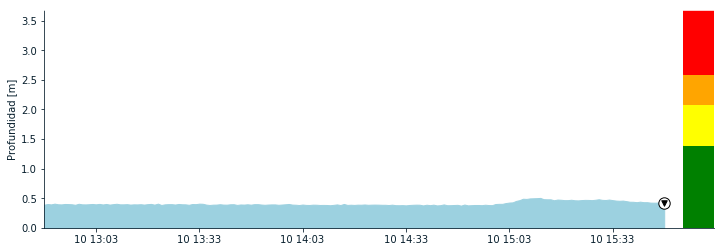

In [14]:
objeto.plot_level(nivel/100.) # se divide por 100 para que sea en metros

consulta de datos del sensor (sin restar el offset), de la tabla "datos" de la base de datos

In [15]:
sensor = objeto.sensor(start,end)
sensor.head()

2018-04-10 12:48:00    1245.89
2018-04-10 12:49:00    1244.81
2018-04-10 12:50:00    1245.46
2018-04-10 12:51:00    1244.17
2018-04-10 12:52:00    1245.24
Freq: T, Name: NI, dtype: float64

In [16]:
# nivel = offset - sensor

In [17]:
(objeto.info.offset-sensor).head()

2018-04-10 12:48:00    39.11
2018-04-10 12:49:00    40.19
2018-04-10 12:50:00    39.54
2018-04-10 12:51:00    40.83
2018-04-10 12:52:00    39.76
Freq: T, Name: NI, dtype: float64

consulta de nivel en todas las estaciones

Se ha creado una base de datos local, para administrar los datos hidrológicos, en esta tabla solo se muestran datos procesados y filtrados. Se leen los datos de nivel de la siguiente manera

In [18]:
objeto.level_local(start,end).head()

fecha
2018-04-10 12:50:00    39.992
2018-04-10 12:55:00    39.800
2018-04-10 13:00:00    39.948
2018-04-10 13:05:00    39.906
2018-04-10 13:10:00    39.628
Name: nivel, dtype: float64

en esta base de datos se pueden hacer consultas grandes sin generar problemas de procesamiento

para obtener datos de todas las estaciones

In [19]:
objeto.level_local_all(start,end).head()

codigo,90,91,92,93,94,96,98,99,101,104,...,251,259,260,265,268,272,273,283,1013,1014
fecha,,,,,,,,,,,,,,,,,,,,,
2018-04-10 12:50:00,87.378,26.20,39.536,49.648,39.2,32.8,6.574,39.992,25.324,15.794,...,14.134,6.110,602.956,19.842,21.206,57.286,22.552,NaN,63.7800,63.266
2018-04-10 12:55:00,87.610,26.20,39.746,49.712,39.8,33.2,7.188,39.800,25.310,15.718,...,14.098,5.984,603.378,19.550,21.308,57.244,22.628,NaN,63.4460,62.684
2018-04-10 13:00:00,88.158,26.00,39.598,50.004,38.4,33.0,7.660,39.948,25.236,15.898,...,13.892,5.998,603.906,19.702,21.244,56.882,22.718,NaN,63.6620,62.542
2018-04-10 13:05:00,88.006,26.25,39.768,49.878,38.6,33.0,6.674,39.906,24.530,15.796,...,13.932,5.996,604.306,19.718,21.128,57.180,22.488,NaN,63.2525,62.395
2018-04-10 13:10:00,88.224,26.00,39.686,50.130,39.0,33.0,7.368,39.628,24.250,15.602,...,14.124,5.794,604.750,19.458,21.194,57.436,22.272,NaN,63.6880,62.310


para convertir valores de profundidad al nivel de riesgo que representa

In [20]:
print objeto.risk_levels # niveles de riesgo

(140.0, 210.0, 260.0, 350.0)


In [21]:
profundidad_lamina = 240.0
objeto.convert_level_to_risk(profundidad_lamina,objeto.risk_levels)

2

último levantamiento topo-batimétrico

In [22]:
x_sensor = objeto.info.x_sensor # se define la distancia del eje al sensor
objeto.last_bat(x_sensor)

,x,y
1,0.000,3.49
2,4.700,3.49
3,4.700,0.47
4,4.700,0.18
5,7.783,0.15
6,10.866,0.01
7,13.949,-0.02
8,17.030,-0.12
9,20.110,0.00
10,21.000,0.00


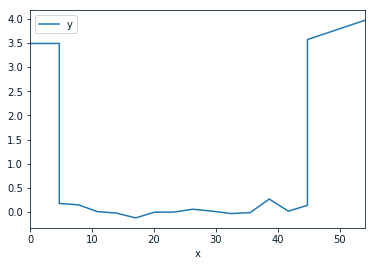

In [23]:
objeto.last_bat(x_sensor).plot(x='x',y='y')

### ejemplo
graficar la sección transversal del canal con una lámina de agua de 1.2 metros

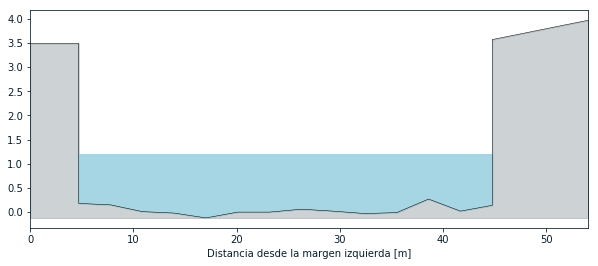

In [24]:
batimetria = objeto.last_bat(x_sensor)
nivel_de_agua = 1.2
objeto.plot_section(batimetria,level=nivel_de_agua)

## Módulo wmf en cpr
cpr utiliza varias funciones del módulo wmf de Nicolás. Wmf es un módulo que que tiene funciones para trabajar datos de radar, cuencas, raster etc.

en este caso se importa el módulo y con el argumento SimuBasin = True.

In [54]:
codigo = 90
objeto = cpr.Nivel(codigo = codigo,user='sample_user',passwd='s@mple_p@ss',SimuBasin=True)

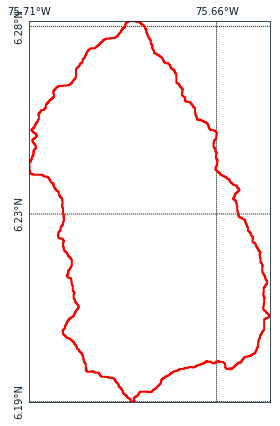

(<mpl_toolkits.basemap.Basemap at 0x7ff407d96c90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff4088003d0>)

In [55]:
objeto.Plot_basin() # Plot_basin() es una función heredada de wmf y muestra el polígono de la cuenca

para leer lluvia de radar

In [56]:
start = '2017-03-26 14:00'
end = '2017-03-26 21:00'

In [57]:
intensidad = objeto.radar_rain(start,end)

converting rain data, it may take a while
/media/nicolas/Home/Jupyter/MarioLoco/repositories/CPR/cprv1/RadarConvStra2Basin2.py 2017-03-26 2017-03-27 /media/nicolas/maso/Mario/basins/90.nc /media/nicolas/Home/nicolas/101_RadarClass/ /media/nicolas/maso/Mario/user_output/radar/201703261400-201703262100-90-sample_user -t 300 -v -s -1 19:00 -2 02:00
None
201703261400-201703262100-90-sample_user


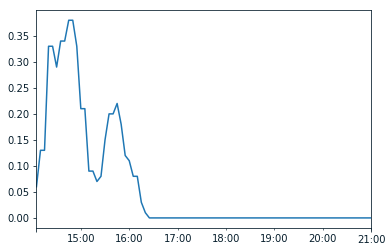

In [58]:
intensidad.plot()

para obtener el campo de lluvia 

In [59]:
vec = objeto.radar_rain_vect(start,end)

201703261400-201703262100-90-sample_user
/media/nicolas/maso/Mario/user_output/radar/201703261400-201703262100-90-sample_user


In [60]:
vec.head()

,0,1,2,3,4,5,6,7,8,9,...,259629,259630,259631,259632,259633,259634,259635,259636,259637,259638
2017-03-26 14:05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-03-26 14:10:00,423,423,423,0,423,423,0,423,423,0,...,0,0,0,0,0,0,0,0,0,0
2017-03-26 14:15:00,423,423,423,0,423,423,0,423,423,0,...,0,0,0,0,0,0,0,0,0,0
2017-03-26 14:20:00,985,985,985,0,985,985,246,985,985,0,...,0,0,0,0,0,0,0,0,0,0
2017-03-26 14:25:00,985,985,985,0,985,985,246,985,985,0,...,0,0,0,0,0,0,0,0,0,0


se obtiene un DataFrame con los vectores de lluvia, supongamos que se quiere encontrar la lluvia en la fecha 2017-03-26 14:20:00, entonces simplemente se utiliza

In [61]:
vec.loc['2017-03-26 14:20:00'].values

array([985, 985, 985, ...,   0,   0,   0], dtype=int32)

para graficar rápidamente

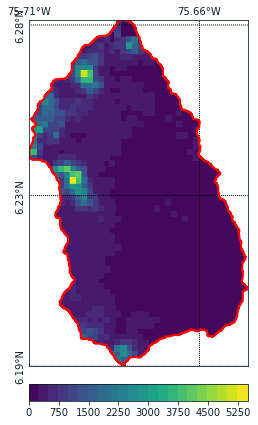

(<mpl_toolkits.basemap.Basemap at 0x7ff407f6c890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff407e33910>)

In [62]:
objeto.Plot_basin(vec.loc['2017-03-26 14:20:00'].values)

# para acumular lluvia en determinada ventana

supongamos que se requiere acumular la lluvia desde las 15:00 hasta las 17:00 en el mismo evento

In [63]:
acumulado = vec.loc['2017-03-26 15:00:00':'2017-03-26 17:00:00'].sum().values
acumulado

array([1196, 1196, 1196, ...,    0,    0,    0])

para graficarla utilizaremos una función creada para acucmulados de lluvia

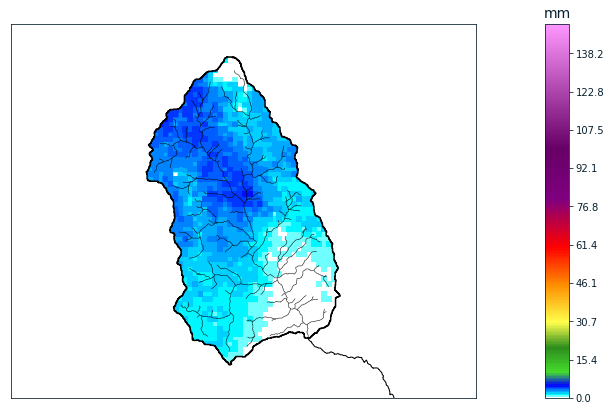

In [64]:
objeto.plot_basin_rain(acumulado/1000.,cbar=True)

# reporte de niveles de riesgo actuales

array([ 90, 108])

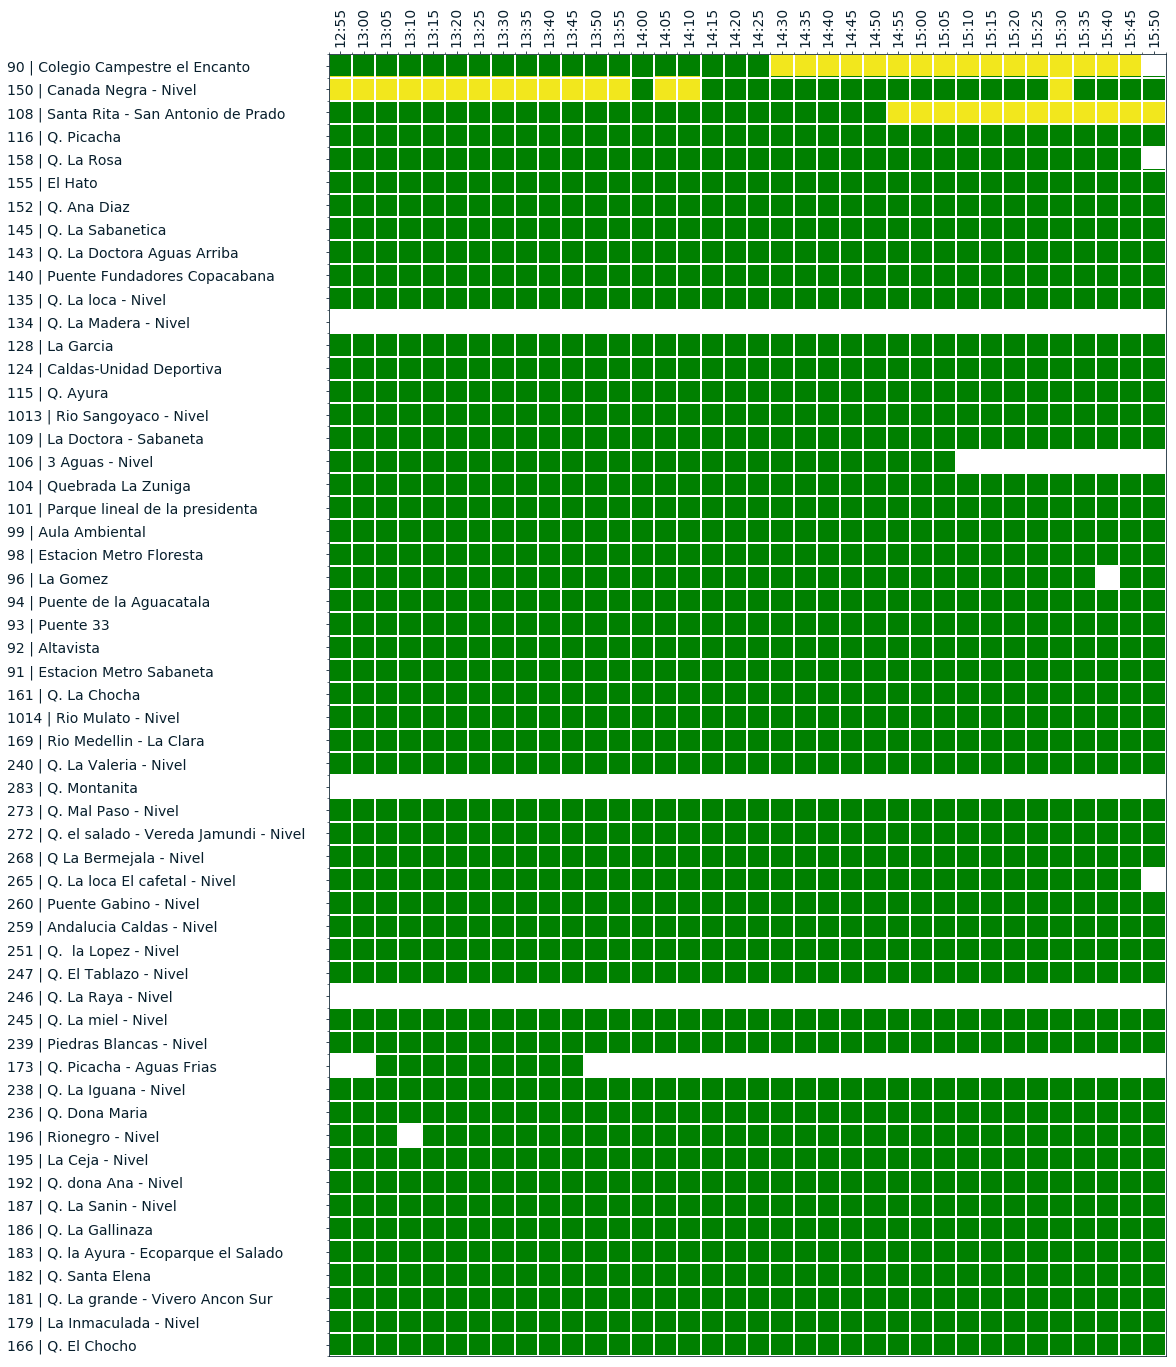

In [65]:
objeto.make_risk_report_current()

converting rain data, it may take a while
/media/nicolas/Home/Jupyter/MarioLoco/repositories/CPR/cprv1/RadarConvStra2Basin2.py 2017-03-26 2017-03-26 /media/nicolas/maso/Mario/basins/90.nc /media/nicolas/Home/nicolas/101_RadarClass/ /media/nicolas/maso/Mario/user_output/radar/201703261150-201703261450-90-sample_user -t 300 -v -s -1 16:50 -2 19:50
None
201703261150-201703261450-90-sample_user
201703261150-201703261450-90-sample_user
90-94.0 minutes


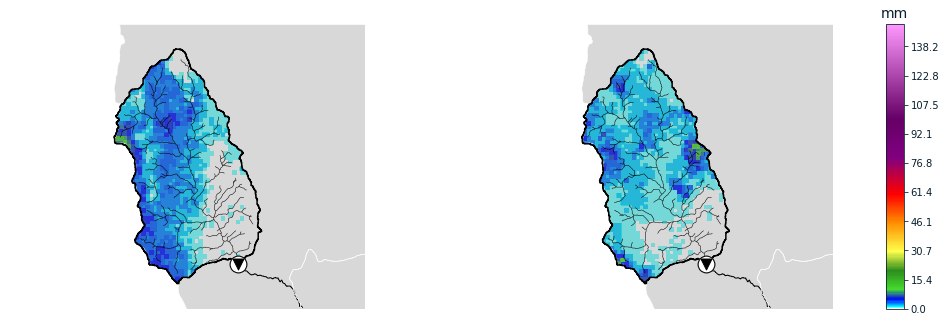

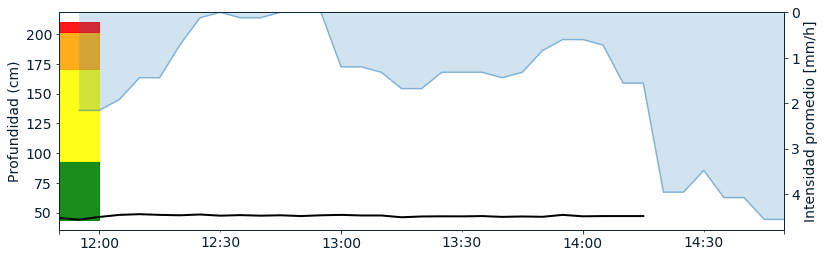

In [66]:
objeto.rain_report('2017-03-26 14:20:00')